Using column: Which AI tools do you currently use for professional or personal development? (select all that apply)


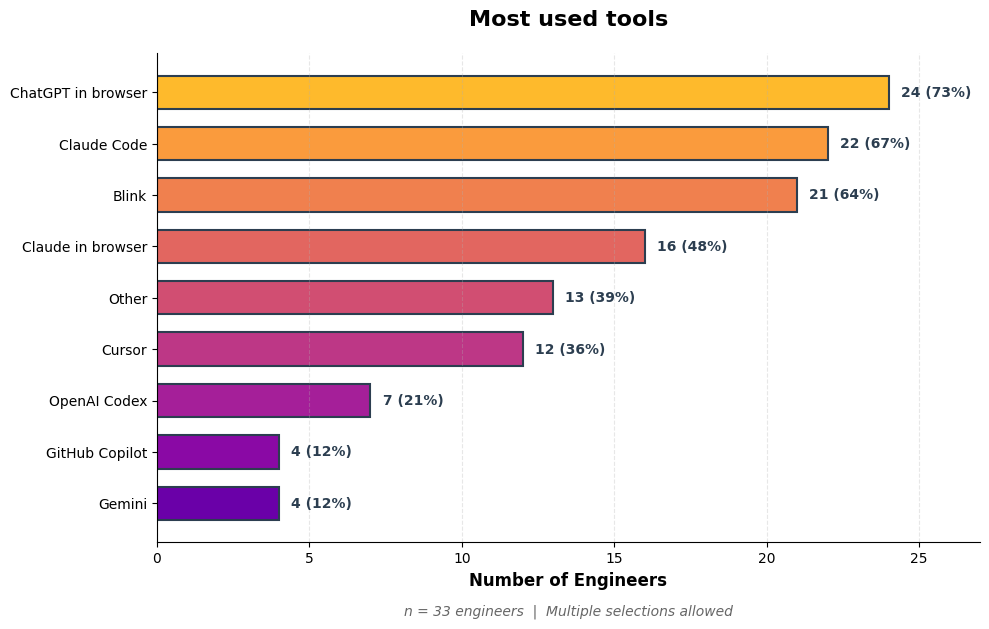


MOST USED TOOLS

📊 Sample Size: 33 engineers
   Total tool selections: 123
   Average tools per engineer: 3.7
   Unique tools mentioned: 9

🛠️  Tool Popularity Rankings:
   1. ChatGPT in browser: 24 engineers (72.7%)
   2. Claude Code: 22 engineers (66.7%)
   3. Blink: 21 engineers (63.6%)
   4. Claude in browser: 16 engineers (48.5%)
   5. Other: 13 engineers (39.4%)
   6. Cursor: 12 engineers (36.4%)
   7. OpenAI Codex: 7 engineers (21.2%)
   8. Gemini: 4 engineers (12.1%)
   9. GitHub Copilot: 4 engineers (12.1%)

✨ Key Insights:
   • Top 3 tools:
     1. ChatGPT in browser - 24 engineers (73%)
     2. Claude Code - 22 engineers (67%)
     3. Blink - 21 engineers (64%)
   • Engineers are using an average of 3.7 different AI tools
   • This diversity shows engineers are experimenting and finding what works best




In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Access column N (index 13, since A=0, B=1, ..., N=13)
# This should be the AI tools column
tools_col = df_filtered.columns[13]

print(f"Using column: {tools_col}")

# Parse the multi-select responses (comma-separated values)
all_tools = []
for response in df_filtered[tools_col].dropna():
    # Split by comma and strip whitespace
    tools = [tool.strip() for tool in response.split(',')]
    all_tools.extend(tools)

# Count each tool
tool_counts = Counter(all_tools)

# Convert to DataFrame for easier plotting
tools_df = pd.DataFrame(tool_counts.items(), columns=['AI Tool', 'Count'])
tools_df = tools_df.sort_values('Count', ascending=True)

# Calculate percentages
total_engineers = len(df_filtered)
tools_df['Percentage'] = (tools_df['Count'] / total_engineers) * 100

# Create figure
fig, ax = plt.subplots(figsize=(10, 6.4))

# Modern appealing color gradient (using plasma colormap)
colors = plt.cm.plasma(np.linspace(0.2, 0.85, len(tools_df)))

# Create horizontal bar chart
bars = ax.barh(tools_df['AI Tool'], tools_df['Count'], 
               color=colors, height=0.65, edgecolor='#2C3E50', linewidth=1.5)

# Add value labels on the bars
for bar, count, pct in zip(bars, tools_df['Count'], tools_df['Percentage']):
    ax.text(bar.get_width() + 0.4, bar.get_y() + bar.get_height()/2, 
            f'{int(count)} ({pct:.0f}%)', 
            va='center', fontsize=10, weight='bold', color='#2C3E50')

# Customize the plot
ax.set_xlabel('Number of Engineers', fontsize=12, weight='bold')
ax.set_title('Most used tools', 
             fontsize=16, weight='bold', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, max(tools_df['Count']) + 3)

# Add grid for readability
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add subtitle
plt.text(0.5, -0.15, f'n = {total_engineers} engineers  |  Multiple selections allowed', 
         ha='center', transform=ax.transAxes,
         fontsize=10, style='italic', color='#666666')

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*80)
print("MOST USED TOOLS")
print("="*80)

print(f"\n📊 Sample Size: {total_engineers} engineers")
print(f"   Total tool selections: {len(all_tools)}")
print(f"   Average tools per engineer: {len(all_tools)/total_engineers:.1f}")
print(f"   Unique tools mentioned: {len(tool_counts)}")

print(f"\n🛠️  Tool Popularity Rankings:")
for i, (_, row) in enumerate(tools_df.sort_values('Count', ascending=False).iterrows(), 1):
    tool = row['AI Tool']
    count = int(row['Count'])
    pct = row['Percentage']
    print(f"   {i}. {tool}: {count} engineers ({pct:.1f}%)")

print(f"\n✨ Key Insights:")
top_3 = tools_df.nlargest(3, 'Count')
print(f"   • Top 3 tools:")
for i, (_, row) in enumerate(top_3.iterrows(), 1):
    print(f"     {i}. {row['AI Tool']} - {int(row['Count'])} engineers ({row['Percentage']:.0f}%)")

print(f"   • Engineers are using an average of {len(all_tools)/total_engineers:.1f} different AI tools")
print(f"   • This diversity shows engineers are experimenting and finding what works best")

print("\n" + "="*80 + "\n")